In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings("ignore")

## **Soru 1** 
#### **Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim.**


In [2]:
gender_list = ['Female', 'Male']
educationlevel_list = ["Elementary", "High School", "College", "Graduate", "Post-Graduate"]

_dict= [{ 'Nominal':np.random.choice(gender_list),
          'Ordinal':np.random.choice(educationlevel_list),
          'Interval':np.random.uniform(0,10000),
          'Ratio':np.random.randint(10,100)} for x in range(10)]
df = pd.DataFrame(_dict)
df

,Nominal,Ordinal,Interval,Ratio
0,Female,High School,9780.525733,71
1,Male,Post-Graduate,6254.154782,31
2,Female,College,3079.950262,86
3,Female,Graduate,3601.614049,31
4,Female,Post-Graduate,9738.932087,73
5,Female,College,2374.089034,34
6,Male,Elementary,7028.572161,29
7,Female,Post-Graduate,5774.286553,17
8,Female,Post-Graduate,7545.154299,99
9,Female,Graduate,1701.294798,66


## **Soru 2 :**
#### **Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım.**


In [3]:
### read_csv ile .csv dosyası okunur

data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
### ilgili kolonlardan yeni bir df oluşturulur

new_df = data[["diagnosis","radius_mean","area_mean","compactness_mean"]]
new_df.head()

,diagnosis,radius_mean,area_mean,compactness_mean
0,M,17.99,1001.0,0.27760
1,M,20.57,1326.0,0.07864
2,M,19.69,1203.0,0.15990
3,M,11.42,386.1,0.28390
4,M,20.29,1297.0,0.13280


In [5]:
# eksik veri kontrolü :

new_df.isnull().sum()

diagnosis           0
radius_mean         0
area_mean           0
compactness_mean    0
dtype: int64

In [6]:
# "describe" sayısal verilere sahip olan sütunların istatiksel değerlerini döndürür : 

new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454


**radius_mean** 
* minimum değeri: 6.98 | maksimum değeri: 28.11 | alt çeyrek: 11.70 | üst çeyrek: 15.78 olarak gözlenmektedir, veri kümesinde aykırı değerler olabilir.

* medyan < ortalama olmakla birlikte ortalama ve medyan değerleri birbirine oldukça yakın gözlenlenmektedir.
* ilgili veri kümesi simetrik bir dağılıma yakınsak şekilde sağa çarpık bir dağılıma sahip olabilir.
* standart sapma değeri çok büyük gözlenmektedir, az sayıda aykırı değer barındırıyor olabilir.

**area_mean** 
* minimum değeri: 143.50 | maksimum değeri: 2501.00 | alt çeyrek: 420.30 | üst çeyrek: 782.70 olarak gözlenmektedir, veri kümesi yüksek bir olasılıkla uç değerler barındırıyor olabilir.

* medyan < ortalama ve standart sapması büyük gözlenlenmektedir, veri kümesinin dağılımı sağa çarpık olabilir.

**compactness_mean** 
* minimum değeri: 0.01 | maksimum değeri: 0.34 | alt çeyrek: 0.06 | üst çeyrek: 0.13 olarak gözlenmektedir.

* medyan < ortalama olarak gözlenlenmektedir, standart sapma değeri küçük gözlenmektedir.
* ilgili veri kümesi sağa çarpık bir dağılıma sahip olabilir.

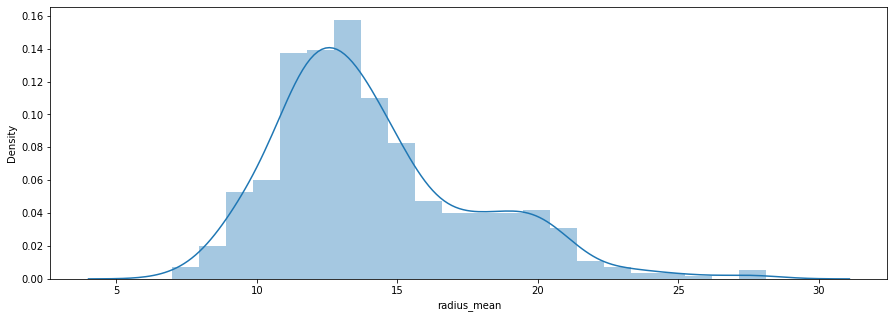

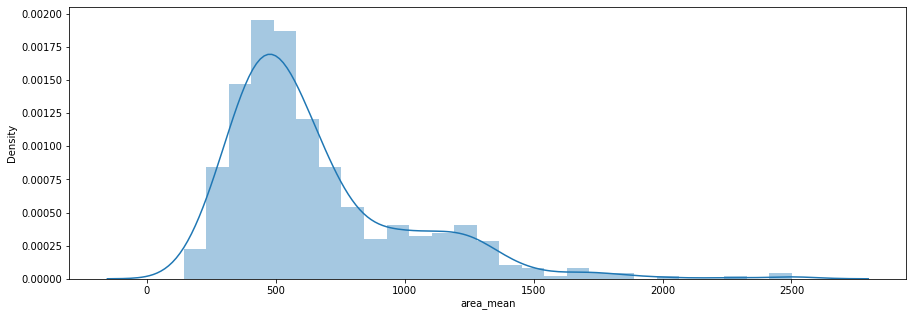

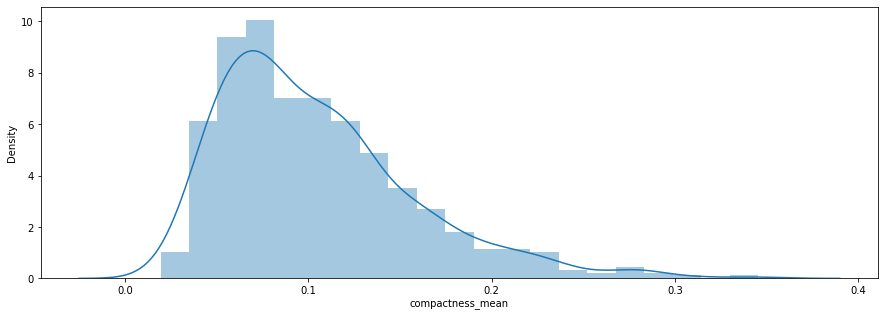

In [7]:
# histogram grafiği ile kolonların gösterimi : 

columns = new_df.columns[1:]

for col in columns:
    plt.figure(figsize=(15,5))    
    sns.distplot(new_df[col])

In [8]:
# IQR metoduyla uç değerlerin tespiti 

for _class in new_df["diagnosis"].unique(): 
    _class_df = new_df[new_df["diagnosis"] == _class]
    print("Diagnosis : ", _class,"\n")

    for col in columns:
        desc = _class_df[col].describe()
        
## Q1 ve Q2 değerlerinin bulunması
### Q1 (alt çeyrek) ve Q3 (üst çeyrek) değerlerini ".describe()" ile oluşturduğumuz yapıdan direkt çektik
      
        Q1 = desc[4]
        Q3 = desc[6]
        
## Çeyrekler Açıklığı(IQR) 

        IQR = Q3-Q1
    
## Üst ve Alt sınırlar bulunur ve uç değerler tespit edilir 

        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        outliers = _class_df[(_class_df[col] < lower_bound) | (_class_df[col] > upper_bound)][col]

        print(col.upper(),"\n""Interquartile Range",":",round(IQR,3),"Lower Bound:",round(lower_bound,3),"Upper Bound:",round(upper_bound,3))

        if len(outliers) == 0:
            print("Outliers Not Found""\n")
        else : 
            print("Outliers:",list(outliers))
            print("\n")

Diagnosis :  M 

RADIUS_MEAN 
Interquartile Range : 4.515 Lower Bound: 8.303 Upper Bound: 26.362
Outliers: [27.22, 28.11, 27.42]


AREA_MEAN 
Interquartile Range : 498.45 Lower Bound: -42.375 Upper Bound: 1951.425
Outliers: [2250.0, 2499.0, 2010.0, 2501.0]


COMPACTNESS_MEAN 
Interquartile Range : 0.063 Lower Bound: 0.015 Upper Bound: 0.267
Outliers: [0.2776, 0.2839, 0.3454, 0.2768, 0.2867, 0.2832, 0.3114, 0.277]


Diagnosis :  B 

RADIUS_MEAN 
Interquartile Range : 2.29 Lower Bound: 7.645 Upper Bound: 16.805
Outliers: [6.981, 16.84, 17.85]


AREA_MEAN 
Interquartile Range : 172.9 Lower Bound: 118.85 Upper Bound: 810.45
Outliers: [880.2, 838.1, 992.1, 819.8]


COMPACTNESS_MEAN 
Interquartile Range : 0.042 Lower Bound: -0.007 Upper Bound: 0.16
Outliers: [0.2233, 0.1807, 0.1676, 0.1972, 0.166, 0.1836, 0.2239, 0.2204, 0.1661]




* İlgili kolonlar : "radius_mean", "area_mean", "compactness_mean" için çeyrekler açıklığı yöntemi kullanılarak aykırı değerler tespit edilmiştir. 

* Her iki sınıf ("Malignant" ve "Benign") için ayrı ayrı çeyrekler açıklığı, üst-alt sınır hesaplanmıştır.

* Her grup için ilgili veri kümesinde (örneğin, M grubu - radius_mean kolonu) hesaplanan değerlerin altında veya üstünde kalan kısımlar tespit edilerek "outliers" adlı değişkene atanmıştır.
    
* M grubu için "radius_mean" ve "area_mean" medyan değerleri farklı ve yüksek olduğu gözlenmektedir. Bu iki değişken önemli göstergeler taşıyor olabilir ve öznitelik seçiminde yol gösterici olabilir.

* İki grubu ayırmadan ilgili kolonlardan çıkarılan istatistiksel değerler ile ayırdıktan sonra elde ettiğimiz değerler birbirinden farklıdır. Her iki grubu kendi içinde incelemek, değerlerden anlamlı ve doğru bir çıkarım yapmak için önemlidir.


## **Soru 3 :**

#### **Ekli data üzerindeki aşağıda yer alan kolonların birbirleriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım.**


,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000




# %0.98 : 'radius_mean' ve 'area_mean' değişkenleri arasında pozitif (aynı yönlü) çok güçlü bir ilişki vardır.
# %0.50 : 'radius_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) orta seviye bir ilişki vardır.
# %0.49 : 'area_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) zayıf bir ilişki vardır.




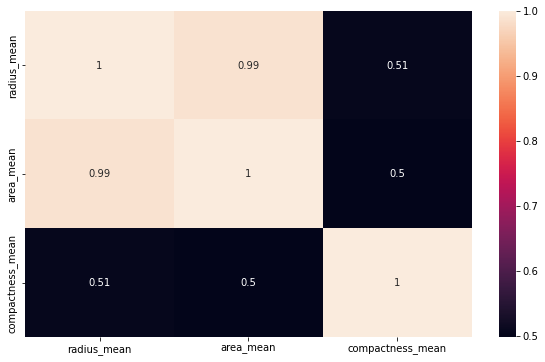

In [9]:
# 1- Korelasyon (Pearson Korelasyon): 

corr = new_df[columns].corr() # (default olarak korelasyon türünü Pearson korelasyon olarak alır)
display(corr)

print("\n")
print("#","%0.98 : 'radius_mean' ve 'area_mean' değişkenleri arasında pozitif (aynı yönlü) çok güçlü bir ilişki vardır.")
print("#","%0.50 : 'radius_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) orta seviye bir ilişki vardır.")
print("#","%0.49 : 'area_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) zayıf bir ilişki vardır.")
print("\n")

#  Korelasyon Matrisi 
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
# 2- Kovaryans

cov = new_df[columns].cov() 

display("kovaryans:", cov)

'kovaryans:'

,radius_mean,area_mean,compactness_mean
radius_mean,12.418920,1224.483409,0.094197
area_mean,1224.483409,123843.554318,9.264931
compactness_mean,0.094197,9.264931,0.002789


* **radius_mean** ve **area_mean** arasında pozitif bir ilişki vardır.
* **radius_mean** ile **compactness_mean** arasında pozitif bir ilişki vardır.
* **radius_mean** ile **compactness_mean** arasında pozitif bir ilişki vardır.

In [11]:
# 3- Pearson Korelasyon

pearson_cor = new_df.corr()   # (default olarak korelasyon türünü Pearson korelasyon olarak alır)
display("Pearson", pearson_cor)

print("#","%0.98 : 'radius_mean' ve 'area_mean' değişkenleri arasında pozitif (aynı yönlü) çok yüksek bir korelasyon vardır.")
print("#","%0.50 : 'radius_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) orta seviye bir korelasyon vardır.")
print("#","%0.49 : 'area_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) zayıf bir korelasyon vardır.","\n")
print("\n")

# 4- Spearman Rank Korelasyon 

spearman_cor = new_df.corr(method="spearman")
display("Spearman Rank", spearman_cor)

print("#","%0.99 : 'radius_mean' ve 'area_mean' değişkenleri arasında pozitif (aynı yönlü) çok yüksek bir korelasyon vardır.")
print("#","%0.49 : 'radius_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) zayıf bir korelasyon vardır.")
print("#","%0.48 : 'area_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) zayıf bir korelasyon vardır.")

'Pearson'

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


# %0.98 : 'radius_mean' ve 'area_mean' değişkenleri arasında pozitif (aynı yönlü) çok yüksek bir korelasyon vardır.
# %0.50 : 'radius_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) orta seviye bir korelasyon vardır.
# %0.49 : 'area_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) zayıf bir korelasyon vardır. 





'Spearman Rank'

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.999602,0.497578
area_mean,0.999602,1.000000,0.488988
compactness_mean,0.497578,0.488988,1.000000


# %0.99 : 'radius_mean' ve 'area_mean' değişkenleri arasında pozitif (aynı yönlü) çok yüksek bir korelasyon vardır.
# %0.49 : 'radius_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) zayıf bir korelasyon vardır.
# %0.48 : 'area_mean' ve 'compactness_mean' değişkenleri arasında pozitif (aynı yönlü) zayıf bir korelasyon vardır.


#### # Her iki korelasyon hesaplanmasında da korelasyon kat sayıları birbirine çok yakındır. 

In [14]:
# 5- Etki Büyüklüğü (Cohen's D)

data_malignant = new_df[new_df["diagnosis"] == "M"]
data_benign = new_df[new_df["diagnosis"] == "B"]

# İki grup("Malignant" ve "Benign") için ilgili değişkenlerin etki büyüklüğünün hesaplanması:

for col in columns:    
    mean_diff = data_malignant[col].mean() - data_benign[col].mean()

    var_benign = data_benign[col].var()
    var_malignant = data_malignant[col].var()

    var_pooled = (len(data_benign)*var_benign +len(data_malignant)*var_malignant ) / float(len(data_benign)+ len(data_malignant))
    effect_size = mean_diff/np.sqrt(var_pooled)
    print(col)
    print("Etki Büyüklüğü: ",effect_size,"\n")

radius_mean
Etki Büyüklüğü:  2.2048585165041414 

area_mean
Etki Büyüklüğü:  2.074764916250813 

compactness_mean
Etki Büyüklüğü:  1.5342341463315066 



* 0.2'nin 'küçük', 0.5'in 'orta' ve 0.8'in 'büyük' etki büyüklüğünü temsil ettiği öne sürülür. Bu bağlamda değerlerin çok yüksek çıktığı gözlenmektedir. Gruplar arasındaki ilgili değişkenler için ortalama farkların 1 hatta 2 standart sapmadan daha uzak olduğunun bir göstergesidir ve karşılatırılan iki grubun ilgili kolonlarının birbirinden farklı olduğunu söyleyebiliriz. 

## **Soru 4 :** 
##### **Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım.**


* Örnek 1 : 
Spam filtreleme. Bayes teoremi, bir e-posta mesajının spam olup olmadığının tahmin etmesine yardımcı olur.

* Örnek 2 : 
İkinci Dünya Savaşı sırasında, İngiliz kod yazarı Alan Turing, “kırılmaz” Enigma kodunun çatlamasına yardımcı olmak için Bayes teorisine dayanan bir sistem geliştirmiştir.Bir mesajdaki bir dizi harfin tahmin edilmesi için sistemi kullanmış, bu da olasılıkların hesaplanmasına ve yeni mesajların geldiği varsayımlarının gözden geçirilmesine yol açmıştır.

* Örnek 3:
Yeni ilaç sınamaları. Yeni bir uyuşturucu madde testinin değerlendirilmesinde de Bayes teoremi yardımcı olabilir. 

* Örnek 4:
Yağmur yağma durumu fıskiyenin çalışma olasılığını etkiler. Çimlerin ıslak olma olasılığı ise hem fıskiyeye hem de yağmura bağlıdır. 

* Örnek 5:
Kullanım alanlarına ek olarak gerçek zamanlı tahmin, çok sınıflı tahmin, metin sınıflandırması, duyarlılık analizi ve öneri sistemleri verilebilir.


## **Soru 5 :**

##### **Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.**


1- Normal Dağılım

* Normal dağılım, aynı zamanda Gauss dağılımı veya Gauss tipi dağılım olarak isimlendirilir ve birçok alanda pratik uygulaması vardır.
* Sürekli olasılık dağılım sınıfındadır.
*Standart normal dağılımda, ortalama 0, standart sapma 1’dir.
* Dağılım ortalamaya göre simetriktir. %50'si sağda %50'si soldadır.
* Aritmetik ortalama, mod ve medyan birbirine eşittir.
* Olasılık dağılımlarında büyük örnekle çalışıldığı takdirde normal dağılıma yaklaşılır.

2- Weibull dağılımı

* Asimetrik dağılımlar ailesinin bir üyesi de Weibull dağılımıdır.
* Yaşama, hayatta kalım ve yetmezlikle yıkım süreçlerini inceleyen verilerin analizi alanında Weibull dağılımı çok elastik olup kolayca değiştirilebildiği için çok kullanılmaktadır.
* Değişik parametre değerleri kullanılarak normal dağılım, üstel dağılım gibi çok popüler diğer istatistiksel dağılımların davranışlarını Weibull dağılımı kullanarak aynen taklit etme imkanı bulunmaktadır. 
* Gamma dağılımından farkı olasılık dağılım fonksiyonlarındaki mod noktasının yerleşimi ve fonksiyon şeklinin farklı olmasıdır.
* Weibull dağılımı pratikte çok kere normal dağılım yerine kullanılmaktadır.
* Sistemde sadece rassal bozulmalar oluyorsa üstel, sistemde birden fazla bileşen bozulması meydana geliyorsa weibull kullanılır.
* Meteorolojide tahminlerde, özellikle de rüzgar hızı ve enerjisi belirleme potansiyelinde sıklıkça kullanılır.

3- Gamma Dağılım

* Gamma dağılımı iki parametreli bir sürekli olasılık dağılımıdır.
* Güvenilirlik teorisi ve yaşam testi için kullanışlıdır.
*Nadiren ham formunda kullanılırken, üstel, ki-kare gibi diğer yaygın olarak kullanılan dağılımlar ve Erlang dağılımları Gamma dağılımının özel durumlarıdır.


4- Logaritmik (log-normal) Dağılım

* Bir değişimin logaritmasının normal dağılım göstermesi durumunda olasılık yoğunluk fonksiyonu log-normal dağılım fonksiyonu ile temsil edilir.
* Log-normal dağılım logaritması normal dağılım gösteren herhangi bir rassal değişken için tek-kuyruklu bir olasılık dağılımdır.
* Log-normal değişkene ilişkin olasılıkların hesaplanması kolaydır.
* Malzeme mukavemetleri, metallerin yorulma ömrü, tasarımların tamamlanma süreleri, yağmur şiddetleri ve hava trafiği hacmi gibi pek çok sayıda rasgele değişken için log-normal dağılım model alınabilir.


5- Poisson 

* Poisson rasgele değişkeni nadir gerçekleşen bir olayın bir zaman aralığında kaç kez meydana geldiğini modellemek için kullanılır.
* Poisson dağılımı, Binom dağılımının, nadir gözlenen bir olayın olasılığının çok küçük olması nedeniyle ortalama gerçekleşme sayısının olası tüm olayların sayısından çok daha küçük olduğu için özel bir durumudur. 
* Poisson dağılımı, Binom dağılımının bir yaklaşımı olduğundan ortalama etrafında asimetrik dağılan bir dağılımdır.

